In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
def remove_first_word(paragraph):
    # Split the paragraph into words and join them back without the first word
    words = paragraph.split()
    return ' '.join(words[1:]) if len(words) > 1 else ''

In [4]:
df['text'] = df['text'].apply(remove_first_word)
    
df.sample(5)

,text,spam
3381,re : meeting ( fwd ) - - bradley romine ees / ...,0
62,save your money by getting an oem software ! n...,1
4280,"re : mscf speaker series pierre , i am working...",0
4464,alp presentation hi vince ! ! i ' ll take care...,0
5192,re : video conference scheduling hello all : t...,0


In [5]:
df.shape

(5728, 2)

In [6]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [7]:
print(df.duplicated().sum())
df = df.drop_duplicates(keep='first')

196


#  -->EDA (Exploratory data analysis) 

In [8]:
df['spam'].value_counts()

spam
0    4165
1    1367
Name: count, dtype: int64

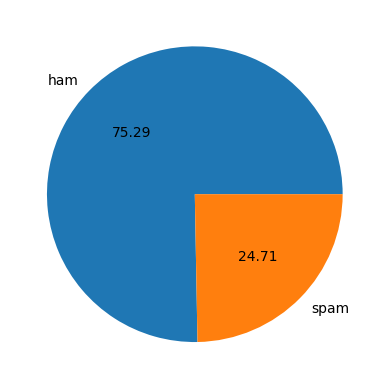

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [10]:
# import nltk     #Natural Language ToolKit library for making column of number of words and sentences in email
# nltk.download('punkt')    # to download some dependances
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

2024-05-20 15:30:58.114 Python[3751:150672] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [11]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [12]:
df

,text,spam,num_characters,num_words,num_sentences
0,naturally irresistible your corporate identity...,1,1457,323,11
1,the stock trading gunslinger fanny is merrill ...,1,585,88,1
2,unbelievable new homes made easy im wanting to...,1,430,86,4
3,4 color printing special request additional in...,1,484,97,5
4,"do not have money , get software cds from here...",1,223,51,9
...,...,...,...,...,...
5723,re : research and development charges to gpg h...,0,1154,296,7
5724,"re : receipts from visit jim , thanks again fo...",0,1124,243,28
5725,re : enron case study update wow ! all on the ...,0,2046,514,30
5726,"re : interest david , please , call shirley cr...",0,1015,275,6


In [13]:
import seaborn as sns

<Axes: xlabel='num_words', ylabel='Count'>

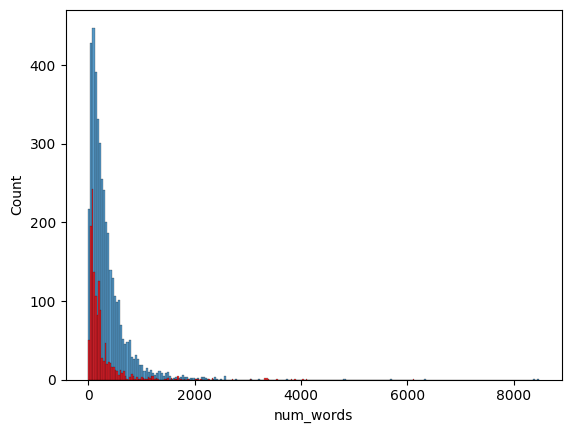

In [14]:
sns.histplot(df[df['spam']==0]['num_words'])
sns.histplot(df[df['spam']==1]['num_words'],color='red')

<Axes: >

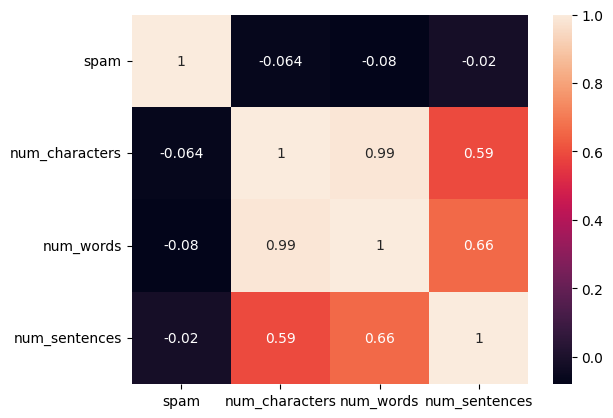

In [15]:
sns.heatmap(df.corr(numeric_only = True),annot=True)

# --> Data Preprocessing
    * Lower case
    * Tokenization  //Breaking into words
    * Removing special characters
    * Removing stop words and punctuation
    * Stemming

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)  # to make string



In [17]:
df['transformed_text'] = df['text'].apply(transform_text)

In [18]:
print(df)

                                                   text  spam  num_characters  \
0     naturally irresistible your corporate identity...     1            1457   
1     the stock trading gunslinger fanny is merrill ...     1             585   
2     unbelievable new homes made easy im wanting to...     1             430   
3     4 color printing special request additional in...     1             484   
4     do not have money , get software cds from here...     1             223   
...                                                 ...   ...             ...   
5723  re : research and development charges to gpg h...     0            1154   
5724  re : receipts from visit jim , thanks again fo...     0            1124   
5725  re : enron case study update wow ! all on the ...     0            2046   
5726  re : interest david , please , call shirley cr...     0            1015   
5727  news : aurora 5 . 2 update aurora version 5 . ...     0            2274   

      num_words  num_senten

In [19]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10, background_color='white')

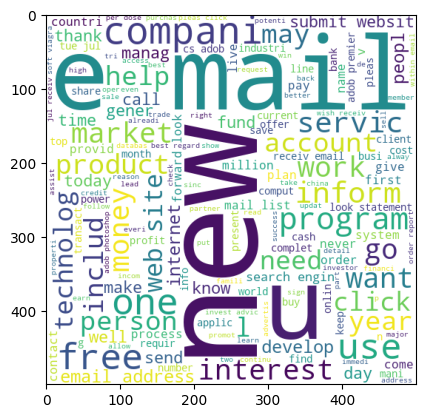

In [20]:
spam_wc = wc.generate(df[df['spam']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)


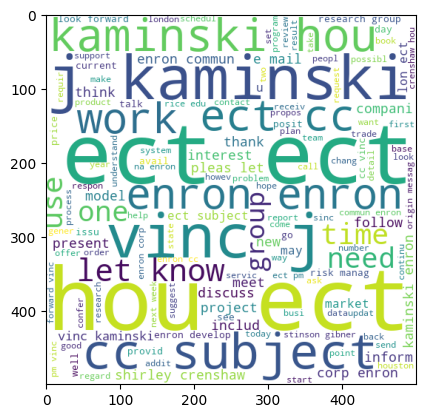

In [21]:
ham_wc = wc.generate(df[df['spam']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [22]:
spam_corpus = []   
for msg in df[df['spam']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

print(len(spam_corpus))

ham_corpus = []   
for msg in df[df['spam']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

print(len(ham_corpus))

173059
671909


In [23]:
from collections import Counter
print(Counter(spam_corpus).most_common(30))
print(Counter(ham_corpus).most_common(30))

[('compani', 1064), ('com', 999), ('1', 952), ('mail', 917), ('busi', 895), ('email', 864), ('inform', 818), ('receiv', 727), ('e', 700), ('get', 694), ('5', 686), ('money', 657), ('pleas', 619), ('2', 613), ('free', 606), ('3', 604), ('http', 603), ('make', 602), ('market', 600), ('time', 592), ('one', 589), ('000', 559), ('click', 552), ('use', 546), ('order', 541), ('invest', 540), ('us', 537), ('offer', 528), ('secur', 519), ('report', 507)]
[('enron', 12668), ('ect', 10994), ('vinc', 8070), ('hou', 5347), ('2000', 4913), ('kaminski', 4507), ('com', 4265), ('pleas', 4251), ('subject', 4022), ('would', 3931), ('cc', 3662), ('j', 3520), ('thank', 3372), ('pm', 3068), ('forward', 2803), ('2001', 2720), ('research', 2602), ('time', 2444), ('1', 2412), ('meet', 2412), ('group', 2328), ('manag', 2243), ('know', 2240), ('2', 2238), ('work', 2174), ('10', 2124), ('market', 2074), ('price', 2067), ('energi', 2066), ('model', 2045)]


# --> Model Building

most of the algorithm like knife based algorithm works on number so we have to first convert our text to number using vectorization 
***
ways to do vectorization are :-
* Bag of words (frequent words)
* TFIDF
* Word to bag

In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X= tfidf.fit_transform(df['transformed_text']).toarray()  # used toarray bcz we get sparse array and we have to change that to dense array
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.12290329 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [25]:
# # code for scaling
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [26]:
df['transformed_text'][0]

'natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest'

In [27]:
y = df['spam'].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [29]:
X_test.shape

(1107, 3000)

In [30]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc =SVC(kernel='sigmoid',gamma=1.0)
knc =KNeighborsClassifier()
dtc =DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc =RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc =ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt =GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [31]:
clfs ={
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost': abc,
    'Bgc' : bc,
    'ETC': etc,
    'GBDT' :gbdt,
    'xgb' :xgb,
    'gnb' :gnb,
    'bnb' : bnb,
}

In [32]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [33]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
#     current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)

#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [34]:
accuracy_scores_3000 = []
precision_scores_3000 = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores_3000.append(current_accuracy)
    precision_scores_3000.append(current_precision)

For  SVC
Accuracy -  0.985546522131888
Precision -  0.9726027397260274
For  KN
Accuracy -  0.9701897018970189
Precision -  0.9709090909090909
For  NB
Accuracy -  0.982836495031617
Precision -  0.9857651245551602
For  DT
Accuracy -  0.9214092140921409
Precision -  0.7839335180055401
For  LR
Accuracy -  0.975609756097561
Precision -  0.9616724738675958
For  RF
Accuracy -  0.983739837398374
Precision -  0.9928057553956835


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9656729900632339
Precision -  0.9319727891156463
For  Bgc
Accuracy -  0.9656729900632339
Precision -  0.9319727891156463
For  ETC
Accuracy -  0.982836495031617
Precision -  0.9963636363636363
For  GBDT
Accuracy -  0.9584462511291779
Precision -  0.9522058823529411
For  xgb
Accuracy -  0.987353206865402
Precision -  0.9695945945945946
For  gnb
Accuracy -  0.9539295392953929
Precision -  0.9616858237547893
For  bnb
Accuracy -  0.943089430894309
Precision -  0.828080229226361


In [35]:
# accuracy_scores_scale = []
# precision_scores_scale = []

# for name,clf in clfs.items():
#     current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)

#     accuracy_scores_scale.append(current_accuracy)
#     precision_scores_scale.append(current_precision)

In [36]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_3000':accuracy_scores_3000,'Precision_3000':precision_scores_3000}).sort_values('Precision_3000',ascending=False)

In [37]:
performance_df

,Algorithm,Accuracy_3000,Precision_3000
8,ETC,0.982836,0.996364
5,RF,0.983740,0.992806
2,NB,0.982836,0.985765
0,SVC,0.985547,0.972603
1,KN,0.970190,0.970909
10,xgb,0.987353,0.969595
11,gnb,0.953930,0.961686
4,LR,0.975610,0.961672
9,GBDT,0.958446,0.952206
6,AdaBoost,0.965673,0.931973


In [38]:
etc.fit(X_train,y_train)
y_pred2=etc.predict(X_test)
print(X_train.shape)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


(4425, 3000)
0.982836495031617
0.9963636363636363


In [46]:
text = "21 st century web specialists jrgbm  dear  it professionals ,  have a problem or idea you need a solution for ?  not sure what it will cost so that you can budget accordingly ?  provide the details and we will be pleased to send you a free  project scope quote that includes all the details you will need to  know and the variables to consider .  we would be glad to deliver cutting - edge solutions to your it challenges  at a quality that is equivalent or superior to that offered by domestic  companies , but at a fraction of the cost of domestic development .  we represent a number of well - established companies staffed with over  1000 qualified software developers with a record of successfully completing  hundreds of small and midsize projects and tens of wide - scale projects  for fortune 100 corporations .  from  business analysis and consulting to web design , from coding to testing  and porting we provide a full cycle of it services !  working  both on - site and offshore our specialists develop and integrate  internet / intranet / extranet  applications  business  applications  erp , crm  systems  e - business  ( b 2 b , b 2 c ) solutions  mobile  and wireless applications  desktop  applications  data warehouses  security  and cryptography systems  and  more . . .  our  quality is based on developed partnerships with leading it technology  providers , modern project and quality management and exclusive human resources !  for  more info . . . click  here ! ! !  please include your phone number ,  and we will be happy to call you !  cost  effective it solutions !  experienced teams of specialists !  fair rates !  free  quotes ! !  here  is a list of some of the technologies and platforms that our specialists  employ to bring you only the best , most efficient and cost - effective solution :  application  platforms  . :  . net  . : java 2 ee  . : ibm websphere suite  . : lotus domino  . : bea weblogic  . : coldfusion  operating  systems  . :  windows ,  . : unix  . : ibm  databases  . :  ms sql  . : oracle  . : db 2  . : foxpro  . : informix  . : sybase  it  standards  . :  activex , com  . : asp  . : corba  . : jdbc  . : odbc  . : wap , wml  for  more info . . . click  here ! ! !  please include your phone number ,  and we will be happy to call you !  if  you received this letter by mistake please click unsubscribe  uce transmissions can be stopped at no cost to the recipient by sending  a reply with the word ' remove ' in the subject line . ( ref .  u . s . senate bill 1618 , title # 3 , section 301 )"

text1 = transform_text(text)
print(text1)

X1 = tfidf.transform([text1])
# # print(df['transformed_text'].type())
# # X1= tfidf.fit_transform(df['transformed_text']).toarray()
print(X1.shape)

y_pred5 = etc.predict(X1)[0]

print(y_pred5)

21 st centuri web specialist jrgbm dear profession problem idea need solut sure cost budget accordingli provid detail pleas send free project scope quot includ detail need know variabl consid would glad deliv cut edg solut challeng qualiti equival superior offer domest compani fraction cost domest develop repres number well establish compani staf 1000 qualifi softwar develop record success complet hundr small midsiz project ten wide scale project fortun 100 corpor busi analysi consult web design code test port provid full cycl servic work site offshor specialist develop integr internet intranet extranet applic busi applic erp crm system e busi b 2 b b 2 c solut mobil wireless applic desktop applic data warehous secur cryptographi system qualiti base develop partnership lead technolog provid modern project qualiti manag exclus human resourc info click pleas includ phone number happi call cost effect solut experienc team specialist fair rate free quot list technolog platform specialist e